In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris =  load_iris()
x = iris.data[:, 2:] # petal length and width
y = iris.target

print(iris.feature_names[2:],y)

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x, y)

['petal length (cm)', 'petal width (cm)'] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [2]:
from sklearn.tree import export_graphviz
import os

PROJECT_ROOT_DIR = "datasets"
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

# export_graphviz(
#     tree_clf,
#     out_file=image_path('iris_tree.dot'),
#     feature_names=iris.feature_names[2:],
#     class_names=iris.target_names,
#     rounded=True,
#     filled=True
# )

![image.png](datasets/images/decision_trees/iris_tree.png)

![image.png](datasets/expression/基尼不纯度.PNG)

计算方式 1–（0/54）^2–（49/54）^2–（5/54）^2≈0.168

In [3]:
# 估算概率
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [5]:
# 估算类别
tree_clf.predict([[5,1.5]])

array([1])

**CART训练算法**

*Scikit-Learn使用的是分类与回归树（Classification And Regression Tree，简称CART）算法来训练决策树（也叫作“生长”树）*

![image.png](datasets/expression/CART成本函数.png)

*CART是一种贪婪算法： 从顶层开始搜索最优分裂， 然后每层重复这个过程。 
几层分裂之后， 它并不会检视这个分裂的不纯度是否为可能的最低值。 
贪婪算通常会产生一个相当不错的解， 但是不能保证是最优解。*


**计算复杂度**

In [ ]:
# 行预测需要从根到叶遍历决策树。 通常来说， 决策树大致平衡， 因此遍历决策树需要经历大约O（log2（m） ） 个节点。 
# （注：log2是以2为底的对数。 等于log2（m） =log（m） /log（2）。） 
# 而每个节点只需要检查一个特征值， 所以总体预测复杂度也只是O（log2（m） ） ， 与特征数量无关。 
# 如此， 即便是处理大型数据集，预测也很快。

# 但是， 训练时在每一个节点， 算法都需要在所有样本上比较所有特征（如果设置了max_features会少一些） 。 
# 这导致训练的复杂度为O（n×m log（m） ）。 
# 对于小型训练集（几千个实例以内），ScikitLearn可以通过对数据预处理（设置presort=True）来加快训练， 但是
# 对于较大训练集而言， 可能会减慢训练的速度。

**基尼不纯度还是信息熵**

In [7]:
# 可以使用criterion='entropy'来选择信息熵来作为不纯度的测量方式。
# 如深度为2的左侧节点的熵值为:-49/54 log(49/54) -5/54 log(5/54)≈0.31

**正则化超参数**

In [8]:
# 为避免过度拟合， 需要在训练过程中降低决策树的自由度。 现在你应该知道， 这个过程被称为正则化。 

In [9]:
# 减小max_depth可使模型正则化， 从而降低过度拟合的风险。
# DecisionTreeClassifier类还有一些其他的参数， 同样可以限制决策树的形状： 
# min_samples_split（分裂前节点必须有的最小样本数）， 
# min_samples_leaf（叶节点必须有的最小样本数量），
# min_weight_fraction_leaf（跟min_samples_leaf一样， 但表现为加权实例总数的占比）， 
# max_leaf_nodes（最大叶节点数量） ， 
# max_features（分裂每个节点评估的最大特征数量） 。 
# 增大超参数min_*或是减小max_*将使模型正则化

# 如果一个节点的子节点全部为叶节点， 则该节点可被认为不必要， 除非它所表示的纯度提升有重要的统计意义。
# 如果这个概率（称之为p值） 高于一个给定阈值（通常是5%， 由超参数控制），那么这个节点可被认为不必要，其子节点可被删除。 
# 直到所有不必要的节点都被删除， 剪枝过程结束。

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [53]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

print(ym)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

[0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0
 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

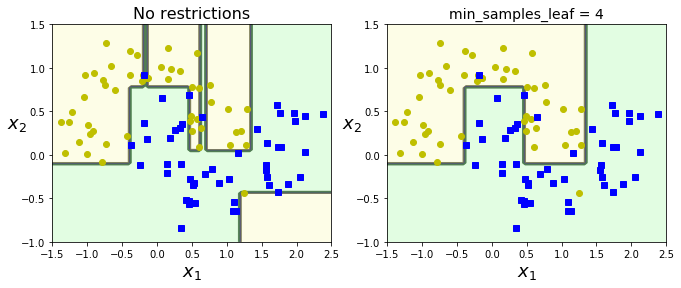

In [54]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

**回归**

In [55]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

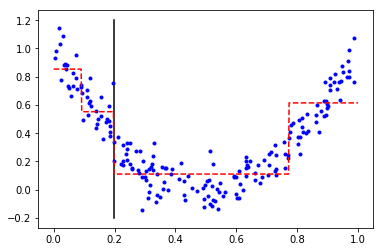

In [71]:
# export_graphviz(
#     tree_reg,
#     out_file=image_path('regress_training.dot'),
#     feature_names=['X'],
#     class_names= y,
#     rounded=True,
#     filled=True
# )
axes = [0, 1, -0.2, 1]
x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
y_pred = tree_reg.predict(x1)

plt.plot(np.linspace(0.197,0.197, 500).reshape(-1, 1) , np.linspace(-0.2,1.2, 500).reshape(-1, 1) , 'k-')
plt.plot(X , y , 'b.')
plt.plot(x1 , y_pred, 'r--')

![image.png](datasets/images/decision_trees/regress_training.png)